In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import pandas as pd
import csv

In [2]:
G = nx.Graph()
with open('relac3.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]

In [3]:
for i in relac: 
    G.add_edge(i[0], i[1], relac = i[2])

Spring Layout


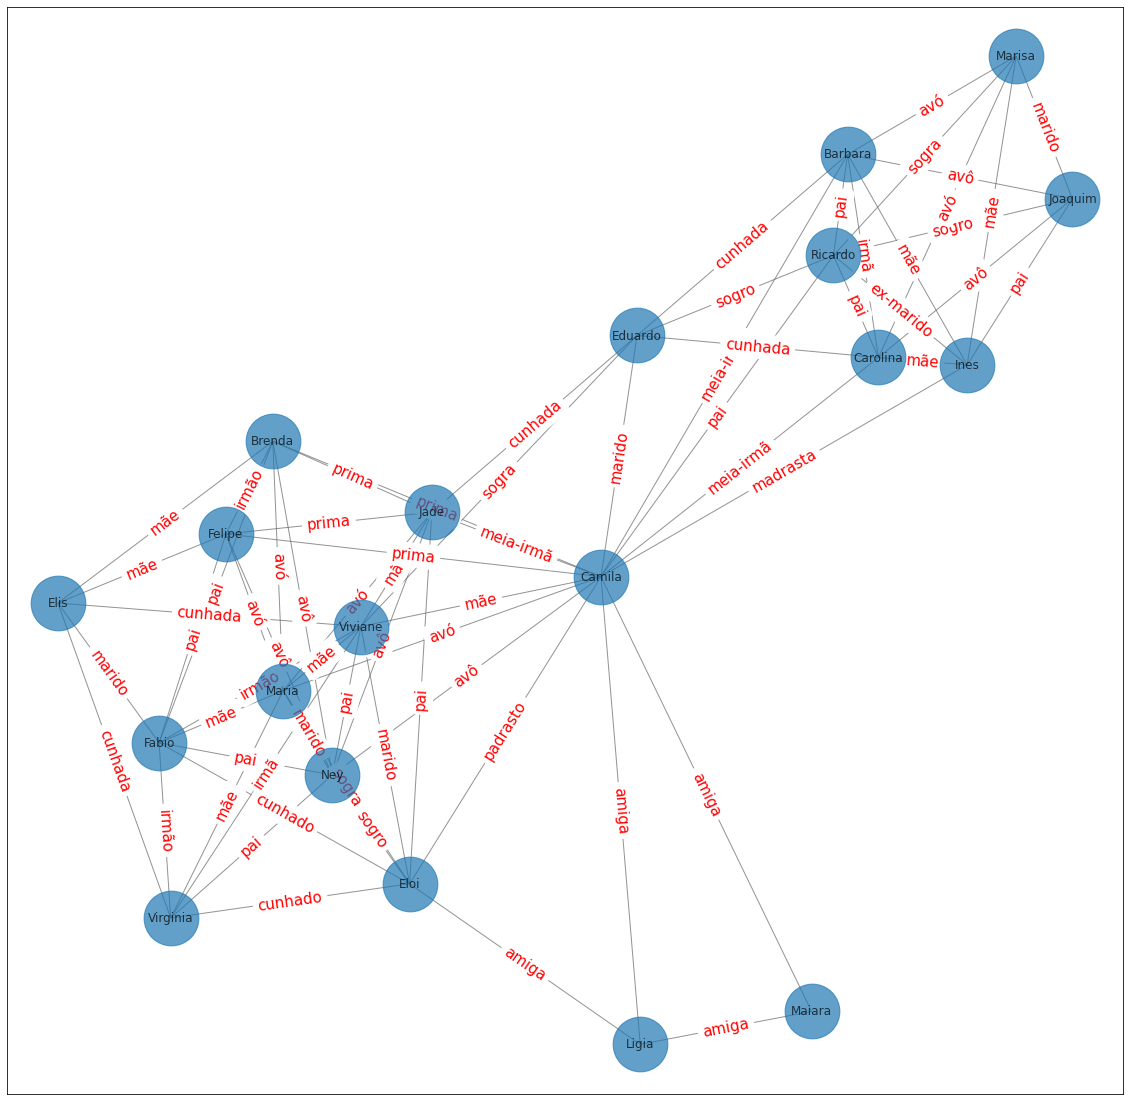

In [4]:
plt.figure(figsize =(20, 20)) 
pos = nx.spring_layout(G) 
print("Spring Layout") 
  
nx.draw_networkx(G, pos,  
                 alpha = 0.7,  
                 with_labels = True,node_size = 3000,  
                 edge_color ='.4', cmap = plt.cm.Blues) 
edge_labels = nx.get_edge_attributes(G,'relac') 
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red',font_size=15)
plt.show()

In [5]:
from pyvis.network import Network

In [6]:
nt = Network("500px", "900px", notebook = True, directed = False)
nt.from_nx(G)
nt.show("grafo.html")

# Densidade: mostra o quão conectada é a rede
A densidade da rede é a proporção de arestas existente na rede em relação a todas as arestas possíveis entre os vértices. Sendo uma proporção, esta quantidade varia entre 0 e 1, sendo que quanto mais próxima de 1 mais densa é rede.

In [7]:
nx.density(G)

0.3631578947368421

# Número de vértices

In [15]:
G.number_of_nodes()

20

# Número de arestas

In [16]:
G.number_of_edges()

69

In [10]:
#Listar quais vértices estão ligados com um vértice específico 
list(G.neighbors('Jade'))

['Viviane', 'Eloi', 'Camila', 'Maria', 'Ney', 'Brenda', 'Felipe', 'Eduardo']

# Grau/ordem de um vértice é o número de aresta ligada ao nó

In [12]:
G.degree['Jade']

8

# Caminho mais curto entre um vértice e outro

In [13]:
# Descobre o caminho de custo mínimo (ccm) do vértice '1' até '2' 
ccm = nx.dijkstra_path(G,source = 'Jade', target = 'Marisa')
print('Caminho de custo mínimo: ',ccm)

Caminho de custo mínimo:  ['Jade', 'Camila', 'Ines', 'Marisa']


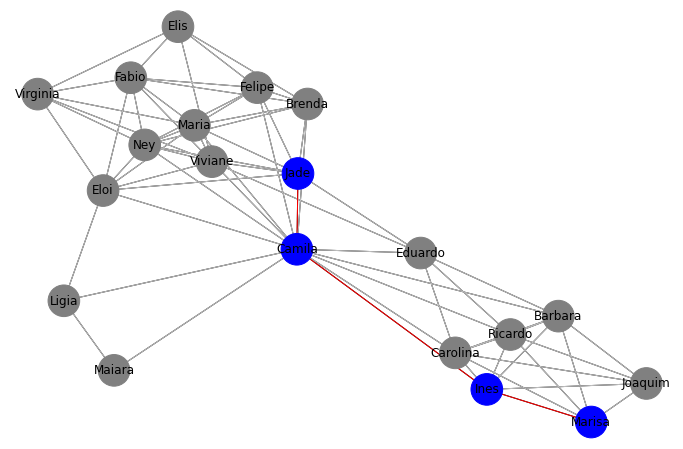

In [14]:
# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de cinza
cor_vertices = ['grey' if not node in ccm else 'blue' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de prata
cor_arestas = ['silver' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# plot da figura
plt.figure(1, figsize=(12, 8))

#Algoritmo de layout
pos=nx.fruchterman_reingold_layout(G)

#retira as bordas
plt.axis('off')

nx.draw_networkx(G, pos,node_color= cor_vertices, node_size=1000)
nx.draw_networkx_edges(G, pos,edge_color= cor_arestas)

plt.show()

# Medidas de Centralidade
Centralidade é uma medida de quão importante um vértice é no contexto de toda a rede. 

## Grau de Centralidade
São considerados mais centrais os vértices com maior quantidade de arestas, de forma que quando a rede é plotada, quanto maior o grau de um vértice, mais ao centro da rede ele estará

In [79]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Camila', 14),
 ('Viviane', 9),
 ('Ney', 9),
 ('Maria', 9),
 ('Eloi', 8),
 ('Jade', 8),
 ('Fabio', 8),
 ('Ricardo', 7),
 ('Barbara', 7),
 ('Carolina', 7),
 ('Felipe', 7),
 ('Brenda', 7),
 ('Eduardo', 6),
 ('Ines', 6),
 ('Virginia', 6),
 ('Elis', 5),
 ('Joaquim', 5),
 ('Marisa', 5),
 ('Ligia', 3),
 ('Maiara', 2)]

In [20]:
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:5]

[('Camila', 0.7368421052631579),
 ('Viviane', 0.47368421052631576),
 ('Ney', 0.47368421052631576),
 ('Maria', 0.47368421052631576),
 ('Eloi', 0.42105263157894735)]

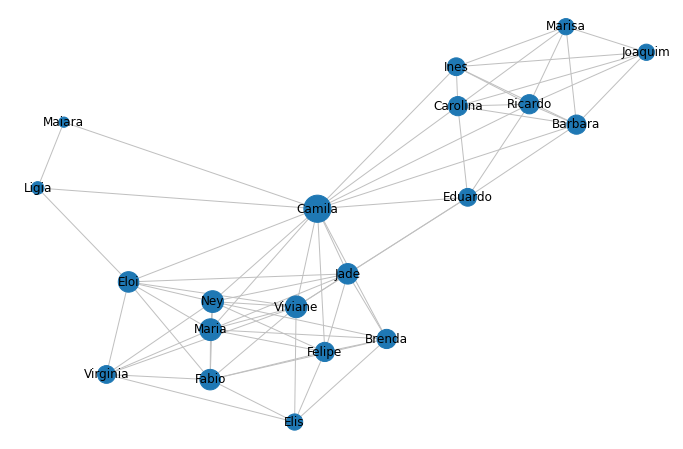

In [21]:
dg = nx.degree_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in dg.values()], edge_color='silver')

## Closeness
Esta medida de centralidade tenta expressar a importância de um vértice pelo fato dele estar próximo a muitos outros vértices.Quanto mais central for um nó, mais próximo estará de todos os outros nós.
Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico Quanto maior o número, mais informações fluem por ele.

In [23]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.7916666666666666
Viviane : 0.6129032258064516
Ney : 0.6129032258064516
Maria : 0.6129032258064516
Eloi : 0.59375
Jade : 0.59375
Eduardo : 0.59375
Felipe : 0.5757575757575758
Brenda : 0.5757575757575758
Ricardo : 0.5588235294117647
Barbara : 0.5588235294117647
Carolina : 0.5588235294117647
Ines : 0.5428571428571428
Ligia : 0.5
Fabio : 0.48717948717948717
Virginia : 0.4634146341463415
Maiara : 0.4634146341463415
Elis : 0.4418604651162791
Joaquim : 0.3958333333333333
Marisa : 0.3958333333333333


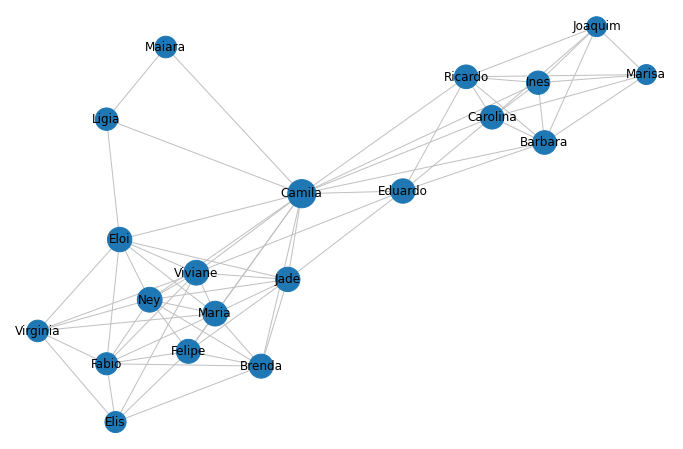

In [126]:
cc = nx.closeness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in cc.values()], edge_color='silver')

## Betweenness
Esta medida de centralidade reconhece como mais importantes os vértices que se localizam na rede de tal forma se localizem entre outros pares de vértices.
Quantifica o número de vezes que o nó age como ponte ao longo do caminho mais curto entre dois nós.
Medida para quantificar o controle de um ser humano sobre a comunicação entre outros seres humanos numa rede social.

In [24]:
for k, v in sorted(nx.betweenness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.48660589094568774
Viviane : 0.08034323951529243
Eloi : 0.047845816620824315
Ricardo : 0.04466486228566868
Barbara : 0.04466486228566868
Carolina : 0.04466486228566868
Eduardo : 0.04345537332610278
Ines : 0.03413406811375417
Ney : 0.02673749024934005
Maria : 0.02673749024934005
Felipe : 0.0266143754447848
Brenda : 0.0266143754447848
Jade : 0.015984405458089667
Fabio : 0.012475633528265109
Virginia : 0.005263157894736841
Ligia : 0.004928989139515455
Elis : 0.004873294346978557
Joaquim : 0.0
Marisa : 0.0
Maiara : 0.0


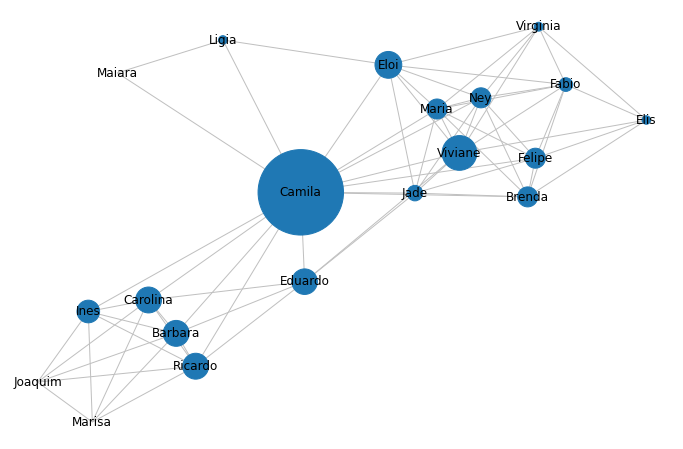

In [26]:
bc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 15000 for v in bc.values()], edge_color='silver')

## Centralidade de autovetor
Atribui maiores pesos aos vértices que estão conectados a outros vértices também importantes.

In [28]:
for k, v in sorted(nx.eigenvector_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.36752131938505433
Ney : 0.32439024828769225
Maria : 0.32439024828769225
Viviane : 0.30560835633108513
Jade : 0.290035653851914
Eloi : 0.27733066974698395
Fabio : 0.2687615742374366
Felipe : 0.25331002651414686
Brenda : 0.25331002651414686
Virginia : 0.21162444312489384
Eduardo : 0.1757711395171973
Elis : 0.16431380483184738
Ricardo : 0.13985734993966
Barbara : 0.13985734993966
Carolina : 0.13985734993966
Ines : 0.12003356938566156
Ligia : 0.08935481012451064
Joaquim : 0.07858398415661785
Marisa : 0.07858398415661785
Maiara : 0.05807716725899205


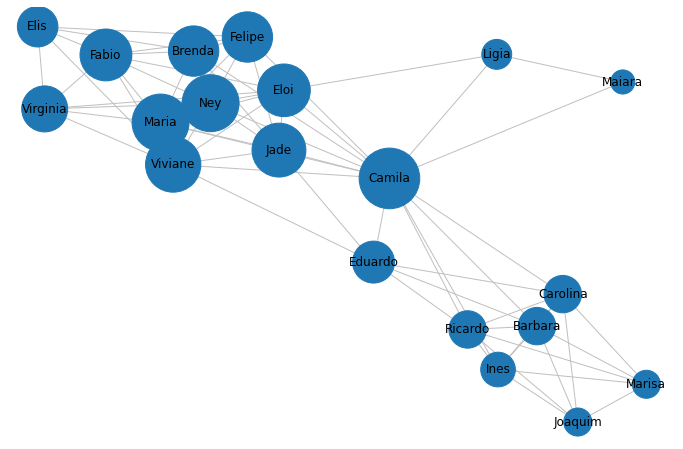

In [92]:
egvector = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 10000 for v in egvector.values()], edge_color='silver')

In [46]:
list(G.neighbors('Camila'))

['Viviane',
 'Eloi',
 'Jade',
 'Eduardo',
 'Ines',
 'Barbara',
 'Carolina',
 'Ricardo',
 'Maiara',
 'Ligia',
 'Maria',
 'Ney',
 'Brenda',
 'Felipe']

In [47]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

[('Camila', 14), ('Viviane', 9), ('Ney', 9), ('Maria', 9), ('Eloi', 8)]

## Partições

In [37]:
import community 
partition = community.best_partition(G, weight='weight')

In [39]:
print(partition)

{'Eloi': 1, 'Viviane': 1, 'Jade': 1, 'Camila': 2, 'Eduardo': 0, 'Ines': 0, 'Ricardo': 0, 'Barbara': 0, 'Carolina': 0, 'Fabio': 1, 'Virginia': 1, 'Elis': 1, 'Felipe': 1, 'Brenda': 1, 'Ney': 1, 'Maria': 1, 'Joaquim': 0, 'Marisa': 0, 'Maiara': 2, 'Ligia': 2}


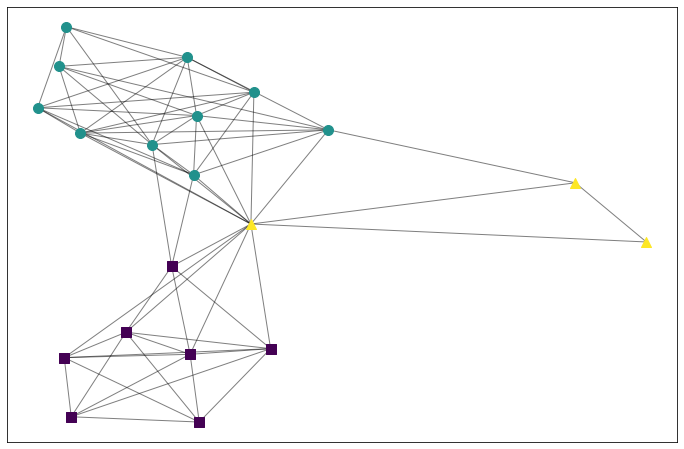

In [44]:
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
# colorindo os nós conforme as comunidades encontradas
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])

In [35]:
H = G.subgraph(['Viviane','Camila','Carolina','Joaquim'])
list(H.edges)

[('Carolina', 'Camila'), ('Carolina', 'Joaquim'), ('Camila', 'Viviane')]

In [36]:
nt = Network("500px", "900px", notebook = True, directed = False)
nt.from_nx(H)
nt.show("subgrafoH.html")